<a href="https://colab.research.google.com/github/papinaidu/Soil-Moisture-Prediction/blob/main/Soil_Moisture_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Required Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Reading the data**

In [ ]:
ssc_project = pd.read_csv("/content/drive/MyDrive/DATA2 .csv")

In [ ]:
ssc_project.head()

,Temperature,Humidity,PhotoDiode,SoilMoisture
0,21.0,72,96,170
1,21.0,72,96,172
2,21.0,72,119,272
3,21.4,72,119,274
4,21.4,72,119,275


In [ ]:
ssc_project.tail()

,Temperature,Humidity,PhotoDiode,SoilMoisture
3741,30.8,62,131,422
3742,30.2,65,132,420
3743,30.2,67,131,420
3744,29.8,68,131,421
3745,29.8,70,131,418


# **Features and Labels of the Data**

In [ ]:
X = ssc_project.drop("SoilMoisture", axis=1)
y = ssc_project["SoilMoisture"]

In [ ]:
X.head()

,Temperature,Humidity,PhotoDiode
0,21.0,72,96
1,21.0,72,96
2,21.0,72,119
3,21.4,72,119
4,21.4,72,119


In [ ]:
X.tail()

,Temperature,Humidity,PhotoDiode
3741,30.8,62,131
3742,30.2,65,132
3743,30.2,67,131
3744,29.8,68,131
3745,29.8,70,131


In [ ]:
y.head()

0    170
1    172
2    272
3    274
4    275
Name: SoilMoisture, dtype: int64

In [ ]:
y.tail()

3741    422
3742    420
3743    420
3744    421
3745    418
Name: SoilMoisture, dtype: int64

# **Data Visualizaion**

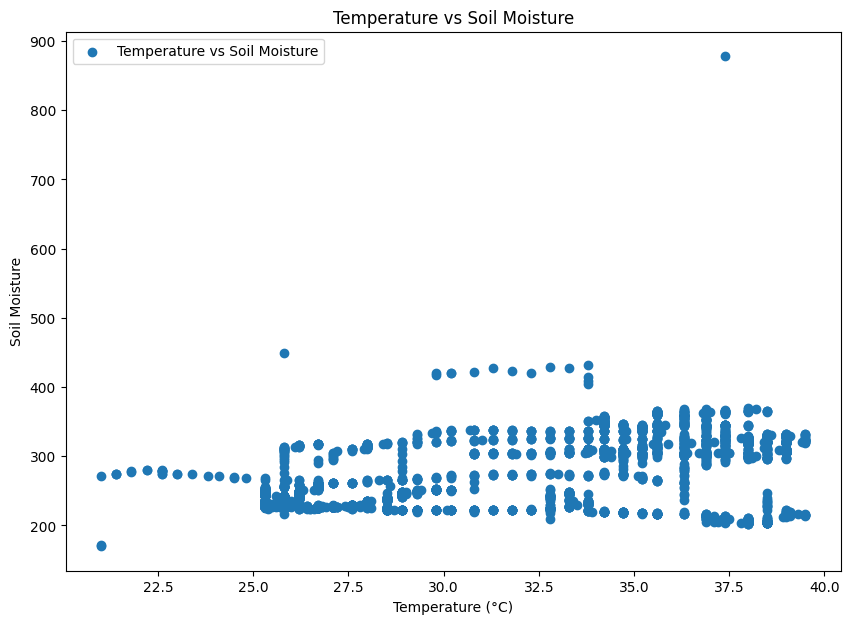

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(ssc_project["Temperature"], ssc_project["SoilMoisture"], label = "Temperature vs Soil Moisture")
plt.xlabel('Temperature (°C)')
plt.ylabel('Soil Moisture')
plt.title('Temperature vs Soil Moisture')
plt.legend()

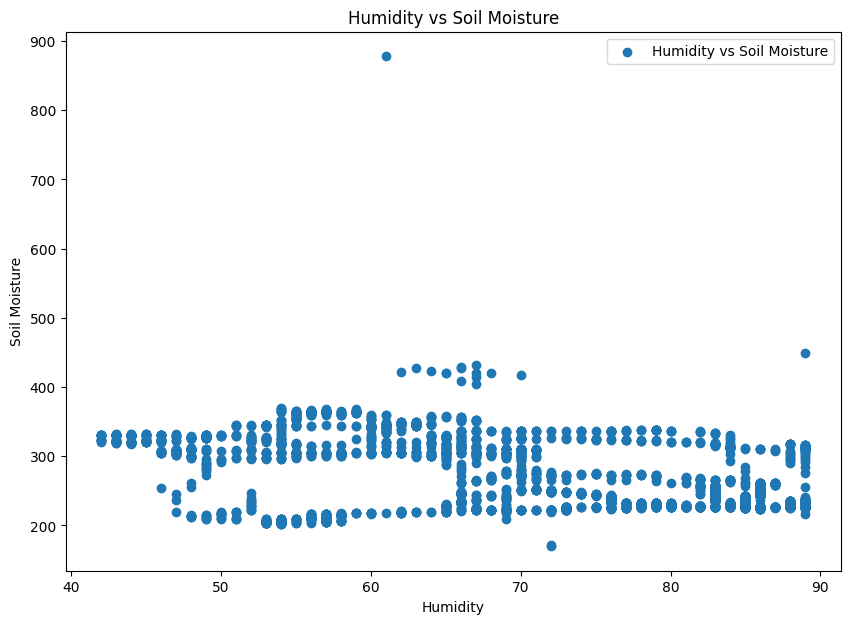

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(ssc_project["Humidity"], ssc_project["SoilMoisture"], label = "Humidity vs Soil Moisture")
plt.xlabel('Humidity')
plt.ylabel('Soil Moisture')
plt.title('Humidity vs Soil Moisture')
plt.legend()

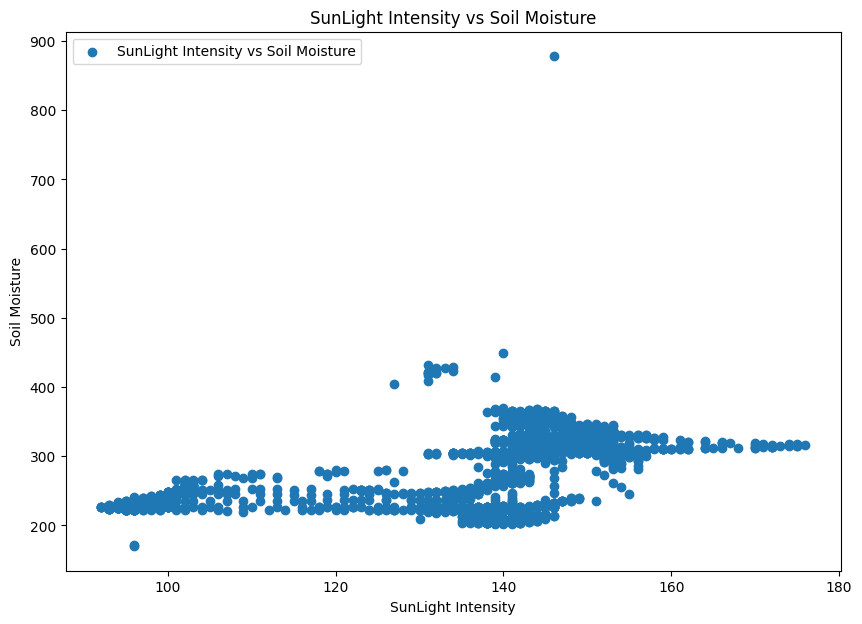

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(ssc_project["PhotoDiode"], ssc_project["SoilMoisture"], label = "SunLight Intensity vs Soil Moisture")
plt.xlabel('SunLight Intensity')
plt.ylabel('Soil Moisture')
plt.title('SunLight Intensity vs Soil Moisture')
plt.legend()

# **Splitting of the Data into Training and Testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2996, 2996, 750, 750)

# **(Deeper) Data Visualization**

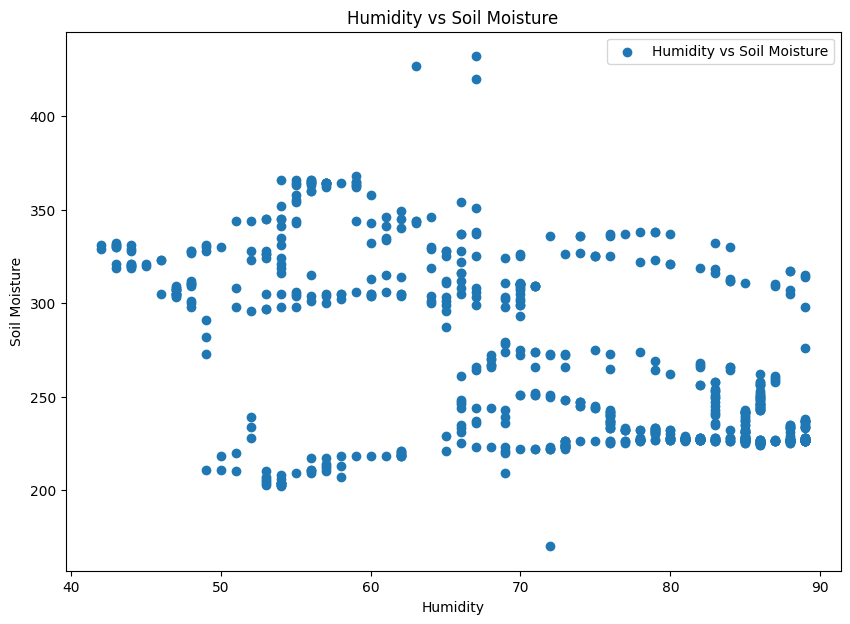

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_test["Humidity"], y_test, label = "Humidity vs Soil Moisture")
plt.xlabel('Humidity')
plt.ylabel('Soil Moisture')
plt.title('Humidity vs Soil Moisture')
plt.legend()

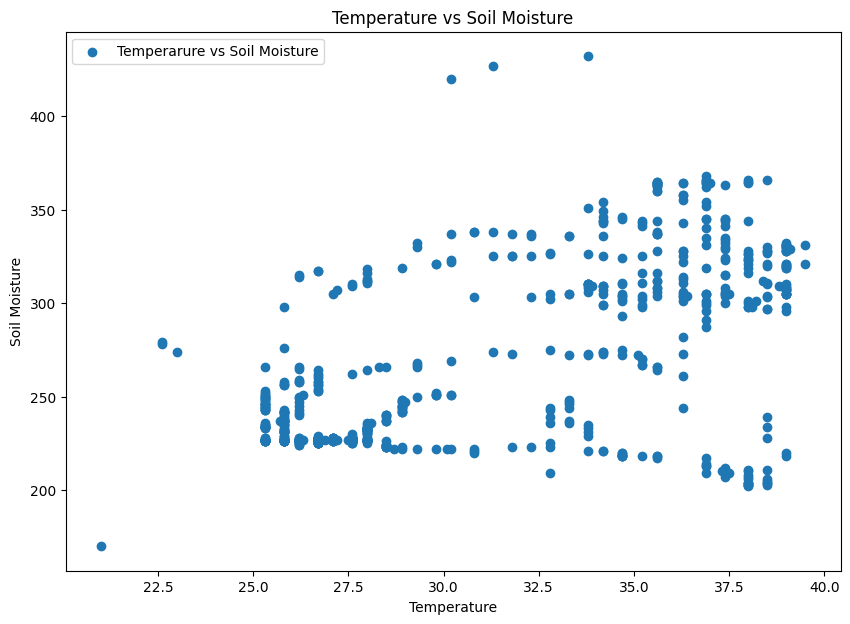

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_test["Temperature"], y_test, label = "Temperarure vs Soil Moisture")
plt.xlabel('Temperature')
plt.ylabel('Soil Moisture')
plt.title('Temperature vs Soil Moisture')
plt.legend()

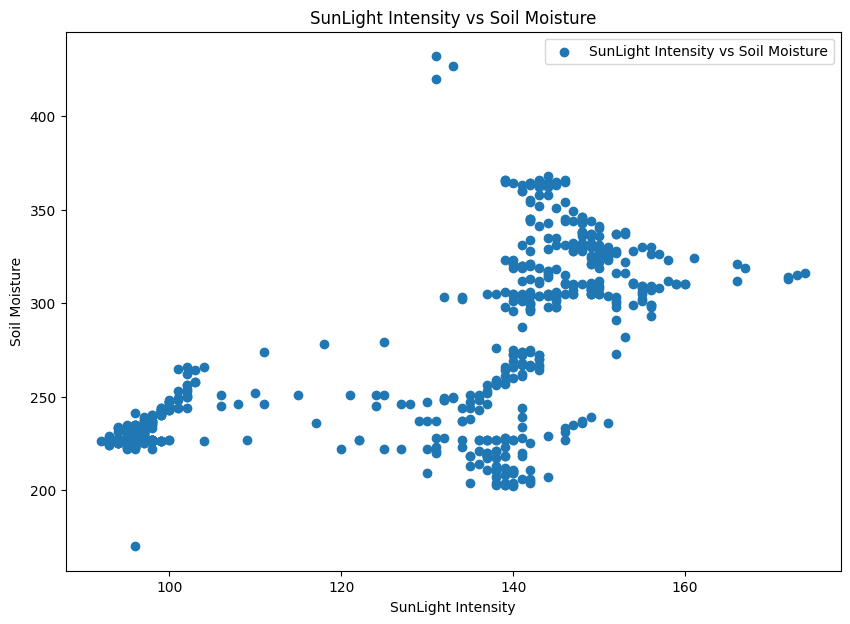

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_test["PhotoDiode"], y_test, label = "SunLight Intensity vs Soil Moisture")
plt.xlabel('SunLight Intensity')
plt.ylabel('Soil Moisture')
plt.title('SunLight Intensity vs Soil Moisture')
plt.legend()

# ****Deep Learning Models****

# **Modelling (without NORMALIZATION)**


# ***Model-01***

In [ ]:
tf.random.set_seed(42)

model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_01.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["mae"])

history_01 = model_01.fit(X_train, y_train, epochs = 100, verbose=0)

In [ ]:
model_01.evaluate(X_test, y_test)

24/24 [==============================] - 0s 4ms/step - loss: 21.2709 - mae: 21.2709


[21.27093505859375, 21.27093505859375]

In [ ]:
#plotting the loss curves

pd.DataFrame(history_02.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

NameError: name 'history_02' is not defined

# **Modelling (with Normalization)**

**Normalization of the data converts each and every value between 0 and 1**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["Temperature","Humidity","PhotoDiode"])
)

X = ssc_project.drop("SoilMoisture", axis=1)
y = ssc_project["SoilMoisture"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.head()

,Temperature,Humidity,PhotoDiode
485,36.3,64,142
2381,31.9,67,136
3299,34.2,70,151
2587,28.0,76,97
258,25.3,86,113


In [ ]:
X_train_normal[0:5]

array([[0.82702703, 0.46808511, 0.5952381 ],
       [0.58918919, 0.53191489, 0.52380952],
       [0.71351351, 0.59574468, 0.70238095],
       [0.37837838, 0.72340426, 0.05952381],
       [0.23243243, 0.93617021, 0.25      ]])

In [ ]:
y_train.head()

485     303
2381    303
3299    325
2587    234
258     245
Name: SoilMoisture, dtype: int64

# ***Model-02***

In [ ]:
tf.random.set_seed(42)

model_02 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_02.compile(loss = tf.keras.losses.mae,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["mae"])

history_02 = model_02.fit(X_train_normal, y_train, epochs = 150, verbose = 0)

In [ ]:
model_02.evaluate(X_test_normal, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 21.4003 - mae: 21.4003


[21.400310516357422, 21.400310516357422]

# ****Machine Leanring Models****

# **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

7.732266666666667


# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
print(mae)

6.370710427906185


In [ ]:
y_pred_rf[0:10]

array([321.49952381, 225.22872781, 263.92983333, 318.85508333,
       329.73066667, 327.68833333, 244.73375872, 266.078     ,
       330.1597381 , 228.10478991])

In [ ]:
y_test[0:10]

3401    316
1114    226
351     264
3731    351
3438    335
1999    323
93      245
358     266
2121    331
1233    227
Name: SoilMoisture, dtype: int64

# **Plotting the Predictions for Machine Learning Model(Random Forest)**

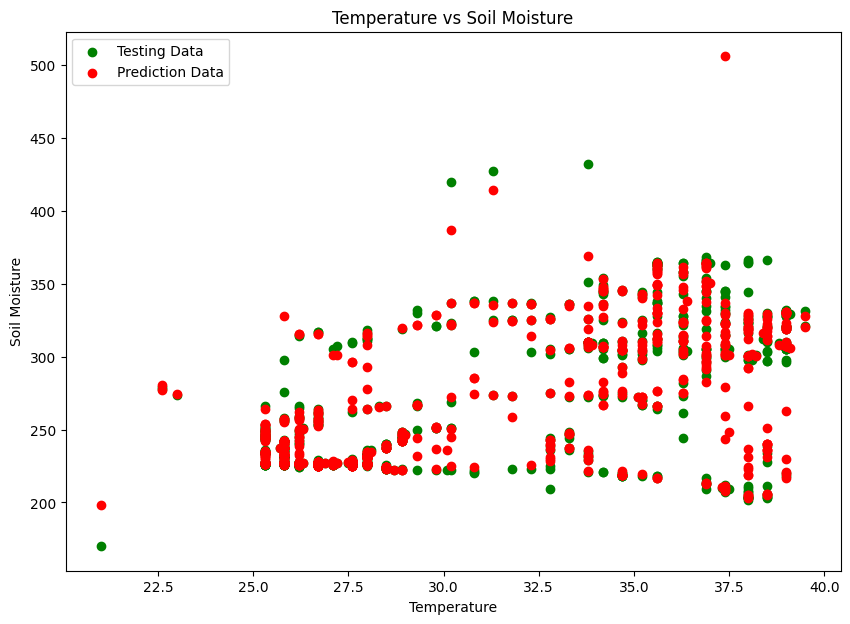

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test["Temperature"], y_test,c = 'g', label = "Testing Data")
plt.scatter(X_test["Temperature"], y_pred_rf, c = 'r', label = "Prediction Data")
plt.xlabel("Temperature")
plt.ylabel("Soil Moisture")
plt.title("Temperature vs Soil Moisture")
plt.legend();

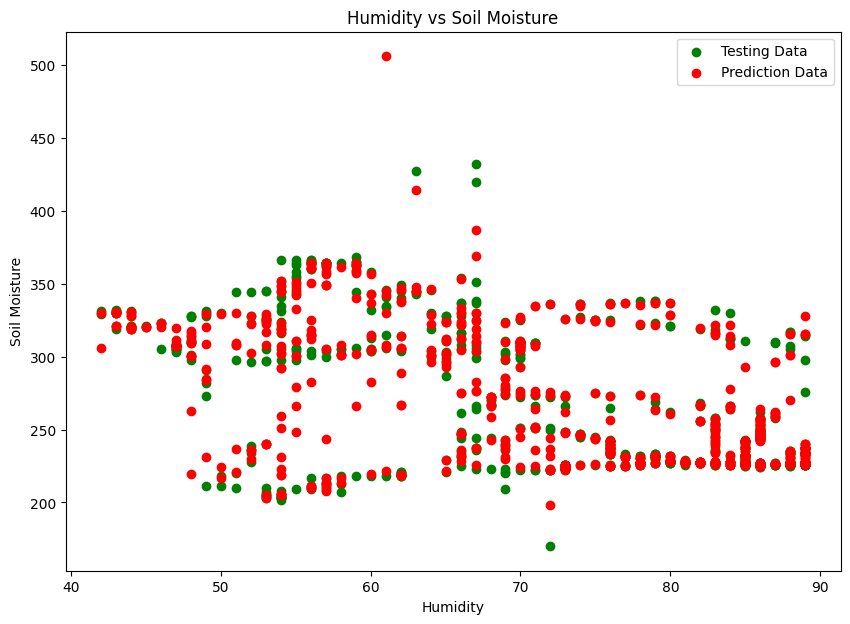

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test["Humidity"], y_test,c = 'g', label = "Testing Data")
plt.scatter(X_test["Humidity"], y_pred_rf, c = 'r', label = "Prediction Data")
plt.xlabel("Humidity")
plt.ylabel("Soil Moisture")
plt.title("Humidity vs Soil Moisture")
plt.legend();

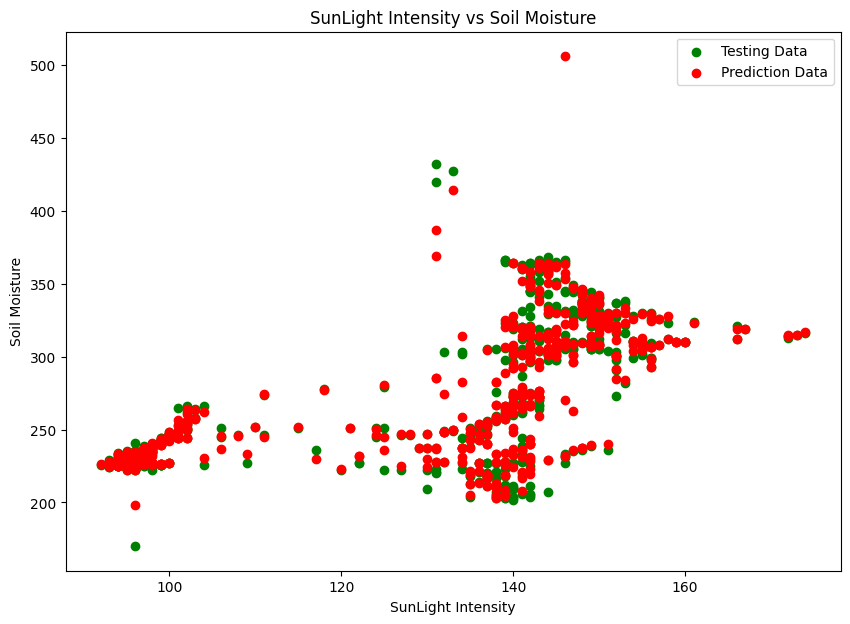

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test["PhotoDiode"], y_test,c = 'g', label = "Testing Data")
plt.scatter(X_test["PhotoDiode"], y_pred_rf, c = 'r', label = "Prediction Data")
plt.xlabel("SunLight Intensity")
plt.ylabel("Soil Moisture")
plt.title("SunLight Intensity vs Soil Moisture")
plt.legend();

In [ ]:
pd.DataFrame(y_pred_rf, y_test)

,0
SoilMoisture,
316,321.499524
226,225.228728
264,263.929833
351,318.855083
335,329.730667
...,...
345,348.537333
209,364.052667
227,226.635379
